In [1]:
# Display all plots inline
%matplotlib inline

import matplotlib.pyplot as plt

## 1. Class KMeansPoints for Implementation of Kmeans Algorithm


Now we import the code for the generic KMeans algorithm, which can be used for different types of problems, such as image clustering. It is built in class KMeansPoints. 

In [2]:
from kmeans import KMeansPoints 

## 2. Visualise against some test data

As a sanity check for the implemented Kmeans algorithm, I checked the outcome against some selected loaded test data (I entered manually some 20+ data points into an Excel spreadsheet). 

The purpose of this test is to visualise the results of the clustering algorithm in a scatter plot. Python offers the matplotlib library for those purposes, and I start by defining a scatter_plot function for graphing the results and load the Excel data into the Jupyter notebook.

Then I use function 'scatter_plot' to display the loaded data in this notebook (using the matplotlib inline directive): 

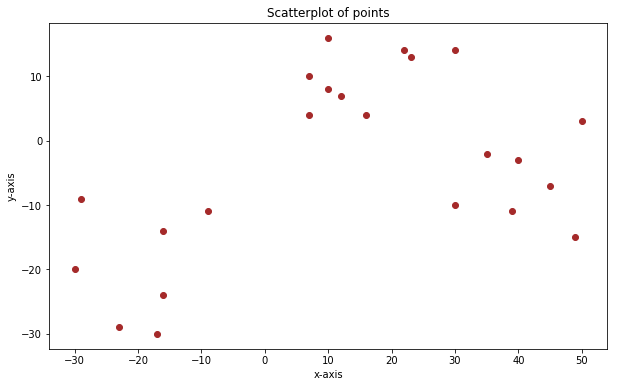

In [3]:
import xlrd
def scatter_plot(x,y): 
    plt.figure(figsize=(10, 6))    
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title("Scatterplot of points")
    plt.scatter(x, y,color='brown', marker= 'o')
    plt.show()


inputs = list()
with xlrd.open_workbook('testdata/testdata.xlsx') as workbook:
    worksheet = workbook.sheet_by_name('test')
    for row_idx in range(1, worksheet.nrows):
        record = [worksheet.cell(row_idx, col_idx).value for col_idx in range(worksheet.ncols)]
        # append new case (as tuple with x and y component)
        inputs.append((record[0], record[1]))

# unzip list of tuples and display scatterplot
x, y = zip(*inputs)
scatter_plot(x,y)  


Figure 3-1. Points visualised in scatterplot

Intuitively we would group the points into three different groups: one to the top at the middle, a second to bottom at the left and the third to the right in the middle. 

We test the newly developed clustering algorithm against this data (with k=3) and visualise the results, by displaying the points in different colours. We use the Euclidean metric, as it is a good measure to describe the distances between points in the diagram. 

In [4]:
# Look for 3 clusters
km = KMeansPoints(3,'Euclidean', False)
km.run(inputs)


Now we visualise the results as they have been produced by the implemented KMeans clustering algorithm.

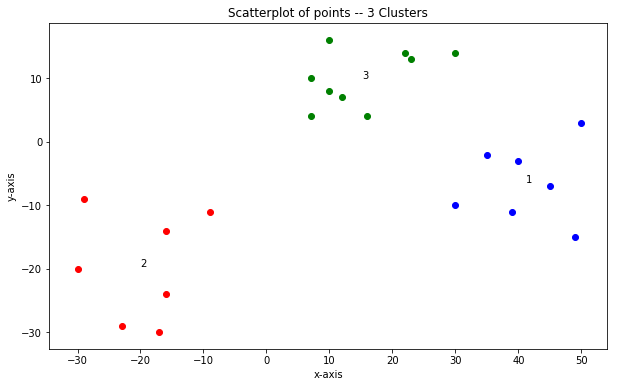

In [5]:
def scatter_plot_by_cluster(km): 
    plt.figure(figsize=(10, 6))    
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title("Scatterplot of points -- " + str(km.k) + " Clusters")
    colors = ["blue", "red", "green"]
    
    dt = km.get_data()
    for key in range(km.k):
        plt.annotate(str(key+1), km.means[key])
        for x, y in dt[key]:    
            plt.scatter(x, y, color=colors[key], marker= 'o')
    
    plt.show()    
    
# Look for 3 clusters
k=3
kmean = KMeansPoints(k,'Euclidean',False)
kmean.run(inputs)

#visualise data in scatterplot 
scatter_plot_by_cluster(kmean) 


Figure 3-2. Points grouped into three clusters

I have visualised the centres of each cluster with its number. E.g. group 1 with the blue dots is at the top of the diagram, with the 1 nicely positioned as the centre of the points. The same can be observed for the groups 2 (red points) and 3 (green points). 

Again - this confirms that the new KMeans algorithm produces reasonable results and we are now in a position to test the same code against actual images. 

In [6]:
from kmeans import KMeansImage 
from PIL import Image 

Now we execute the code for this new class, against the same image as before, with the the same random initialisation of the clusters (using seed), and with the same settings for k and dist. 

This will allow us to compare the outcomes with the results from the previous class (which is based on the matplotlib library). 

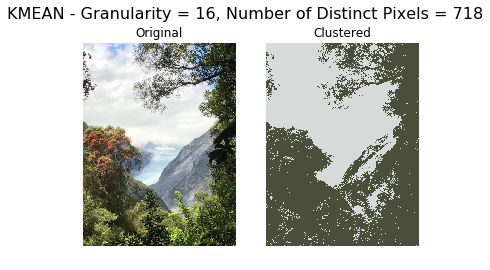

Granularity:                     16
Number of pixel clusters:        718
Number of centroids:             2
Total Number of pixels in image: 139968
Number of loops:                 3
Runtime (in seconds):            0


In [7]:
k=2
dist = 'Manhattan'
imgname = "images/k.jpeg"
km = KMeansImage(k, dist, True)
km.GRANULARITY = 16
img1 = Image.open(imgname)
img2 = Image.open(imgname)
km.run_img(img1)

pixels = km.get_data_img()
img2.putdata(pixels)

f, axarr = plt.subplots(1,2)
f.suptitle("KMEAN - Granularity = "+str(km.GRANULARITY)+", Number of Distinct Pixels = "+str(len(km.pnts.keys())), fontsize=16)
axarr[0].set_title('Original')
axarr[0].imshow(img1)
axarr[0].axis('off')
axarr[1].set_title('Clustered')
axarr[1].imshow(img2)   
axarr[1].axis('off') 
plt.show() 

print('Granularity:                     '+str(km.GRANULARITY))
print('Number of pixel clusters:        '+str(len(km.pnts.keys())))
print('Number of centroids:             '+str(k))
print('Total Number of pixels in image: '+str(sum(km.pnts.values())))
print('Number of loops:                 '+str(km.counter))
print('Runtime (in seconds):            '+str(km.seconds))

Figure 4-2 Input / Output Images for KMeans Clustering with details



It is remarkable that the algorithm runs in '0' seconds (previous algorithm took 7 seconds on the same image). 

Overall - performance of the redeveloped KMeans algorithm, which is based on preprocessed 'image cubes', runs several magnitudes faster than the original KMeans clustering process. Some processes took previously several minutes (in particular with the Euclidean metric and higher values for k). With the new KMeans implementation, those processes can be completed now in a few seconds! 

The reader is encouraged to test the KMeans and DP algorithms in the GUI implementation for this project (app.py). Several test images, including the ones used in this notebook, are included in the submission. However the reader may wish to test the process also with their own images. 

This concludes the Proof-of-Concept coding section for the KMeans clustering algorithm. 